In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
from matplotlib import cm
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.dates as mdates
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['figure.autolayout'] = True

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica:bold'
plt.rcParams['font.size'] = 8

import matplotlib as mpl
%matplotlib inline


In [40]:
df = pd.read_csv('../Data/isotope-data.csv',
                 sep=',',  skiprows = [1])
df['Time Collected'] = df['Time Collected'].fillna('12:00')
df['datetime'] = pd.to_datetime(df['Date Collected']+ ' ' + df['Time Collected'])

# GRAB SAGEHORN WELL AND STREAM DATA
gw = pd.read_csv('../Data/groundwater-stream-levels-precip.csv',
                       parse_dates=True, index_col=[0] )

#Read in rainfall data
precip = pd.read_csv('../Data/rain.csv')
precip.head()
precip.index= pd.to_datetime(precip['LocalDateTime'])                  

#'DataValue' is in units of mm
precip['waterYear']=np.where(~precip.index.month.isin([10,11,12]), 
                             precip.index.year, precip.index.year+1)
precip['WY_Rain']=precip.groupby('waterYear')['DataValue'].cumsum()
precip['runningCumulative']=precip['DataValue'].cumsum()

# sagehornRain = pd.read_csv('sagehornRain.csv')
# sagehornRain['datetime'] = pd.to_datetime(sagehornRain['Date Collected']+ ' ' + sagehornRain['Time Collected'])
# sagehornRain['Integer_Storm_Precip_mm'] = sagehornRain['previousRain'].astype(int)
sagehornRain = df[df['Sample Type II']=='Rain']
sagehornRain.sort_values('datetime',inplace=True)
#find closest indices in the rainfall record that correspond to when isotope values where collected
indices = precip.index.searchsorted(sagehornRain['datetime'].values)

sagehornRain['cumulativeRain_mm'] = precip.iloc[indices]['runningCumulative'].values-1
sagehornRain['previousRain_mm'] = sagehornRain['cumulativeRain_mm'] - sagehornRain['cumulativeRain_mm'].shift(+1)
sagehornRain['previousRain_mm'].iloc[0]=20

#Read in sapflow data
sapflow = pd.read_csv('../Data/sapflow_2016_cumulative_normalized.csv',header=None)
sapflow.columns=['date','Cumulative normalized sapflow']
sapflow.index = pd.to_datetime(sapflow.date)


/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [41]:
# SUBSURFACE SOLIDS

df['edgecolors']='grey'
df.loc[df['Energetic State'] == 'saturated', 'edgecolors'] = 'gold'

drilled = df[(df['Sample Type II']=='Drilled material')]
drilled['Depth (cm)'] = drilled['Depth (cm)'].astype(float)
soil = drilled[drilled['Sample Type III'] =='Soil'] 
sap_wxbedrock = drilled[(drilled['Sample Type III'] =='Saprolite') | 
                        (drilled['Sample Type III'] =='Weathered bedrock')] 

sap_wxbedrock['Sample Type III'].head()

/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


27            Saprolite
28            Saprolite
29    Weathered bedrock
30    Weathered bedrock
31    Weathered bedrock
Name: Sample Type III, dtype: object

In [42]:
set(drilled['Sample Type III'])

{'Fresh bedrock', 'Saprolite', 'Soil', 'Weathered bedrock'}

In [43]:
gw['MN-1'] = gw['WELL MN-1 (Water level from surface (m))']
gw['MS-4'] = gw['WELL MS-4 (Water level from surface (m))']
gw['507'] = gw['WELL 507 (Water level from surface (m))']
gw['datetime']=gw.index

In [44]:
#trim values outside of expected range
gw['MN-1'][(gw['MN-1'] < -1.90) | (gw['MN-1'] > -0.01)] = np.nan

gw['MS-4'][(gw['MS-4'] < -1.86) | (gw['MS-4'] > -0.01)] = np.nan
gw['507'][(gw['507'] < -2.5) | (gw['507'] > -0.01)] = np.nan


/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/wjh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
# READ IN WATER POTENTIAL DATA
### READ IN WATER POTENTIAL DATA
potential = pd.read_csv('../Data/waterpotentials.csv',
                 sep=',')
#                  parse_dates=[['DATE COLLECTED', 'TIME COLLECTED']])
#potential.set_index(['DATE COLLECTED_TIME COLLECTED'], drop=True, inplace=True)
potential = potential[potential['AGE']=='MATURE']
potential = potential[potential['WHAT MEASURED']=='SHOOT']
potential = potential[potential.TREE !='car park big oak']
potential = potential[potential.TREE !='NT']
potential['date'] = pd.to_datetime(potential['DATE COLLECTED'])
potentialSagehorn = potential[potential['SITE']=='SAGEHORN']
potentialSagehornOaks = potentialSagehorn[potentialSagehorn['SPECIES (sci)']=='QUGA']
predawn = potentialSagehornOaks[potentialSagehornOaks['TIME OF DAY']=='pre-dawn']

In [46]:
set(predawn.TREE)

{'204', '205', '206', '207', '208', '209', 'NT ADJ'}

In [47]:
# GROUP WATER POTENTIAL BY SAMPLE DAY, TREE
### MEAN
#group by the date then tree
groupDateTree = predawn.groupby(['date', 'TREE'])
meansPredawn = groupDateTree.agg({'PRESSURE [MPa]' : 'mean'})
meansPredawn = meansPredawn.reset_index()
#then group again by date
groupDate = predawn.groupby(['date'])
meansPredawn = groupDate.agg({'PRESSURE [MPa]' : 'mean'})

### STD
#group by the date then tree
groupDateTree = predawn.groupby(['date', 'TREE'])
stdsPredawn = groupDate.agg({'PRESSURE [MPa]' : 'std'})
stdsPredawn = meansPredawn.reset_index()
#then group again by date
groupDate = predawn.groupby(['date'])
stdsPredawn = groupDate.agg({'PRESSURE [MPa]' : 'std'})


In [48]:
sagehorn = df[df['Site']=='Sagehorn']

sagehornOaks = sagehorn[sagehorn['Species (scientific)']=='QUGA']

startDateTime = pd.to_datetime('2015-01-01 00:00:00')

sagehornOaks2016 = sagehornOaks[sagehornOaks['datetime'] > startDateTime] 
stems = sagehornOaks2016[sagehornOaks2016['Sample Type II']=='Stem']
stems = stems[stems.Location!='T210']

dry = sagehorn[sagehorn['Location'] == 'Dry Creek']
sagehornGW = sagehorn[sagehorn['Sample Type II'] == 'Well water']
sagehornGW['Location'].replace(to_replace='MN-1', value='MN1', inplace=True)
sagehornGW['Location'].replace(to_replace='MS-4', value='MS4', inplace=True)


sagehornGW = sagehornGW[(sagehornGW['Location'] == 'MN1') | 
                      (sagehornGW['Location'] == 'MN-1') |
                      (sagehornGW['Location'] == 'MS4') |
                      (sagehornGW['Location'] == 'MS-4')|
                      (sagehornGW['Location'] == 'W507')]

In [51]:
#sagehornOaks[sagehornOaks['Sample Type II']=='Stem']['Time Collected'].to_list()

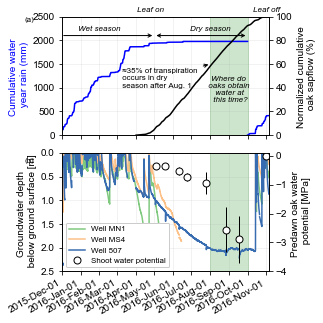

In [52]:
### TIME SERIES - NO ISOTOPES
fig, (ax,ax0) = plt.subplots(2, 1, 
                            sharex=True, 
                            figsize=((11.5/2.54),(11.5/2.54)))
# plt.subplots_adjust(wspace=0.0, hspace=0.0)


stems = stems.sort_values('datetime')
stems = stems[stems.Location != 'T87']
trees = sorted(set((stems['Location'])))
cNormTrees  = colors.Normalize(vmin=0,vmax=5)
scalarMapTrees = cmx.ScalarMappable(norm=cNormTrees, cmap=plt.get_cmap('jet') ) #_r reverses cmap
sagehornGW = sagehornGW.sort_values('datetime')
wells = sorted(set((sagehornGW['Location'])))

cNormWells  = colors.Normalize(vmin=0, vmax=len(wells)+1)
scalarMapWells = cmx.ScalarMappable(norm=cNormWells, cmap=plt.get_cmap('Accent') ) #_r reverses cmap

#PLOT PRECIP AND SAPFLOW

p = precip[precip.index<'2016-10-01']
ax.plot(p.index, p.WY_Rain,c='b')
p = precip[precip.index>'2016-10-01']
ax.plot(p.index, p.WY_Rain,c='b')
ax.set_ylim(0,2500)
label = ax.set_ylabel('Cumulative water \n year rain (mm)')
label.set_color("blue")
twinax = ax.twinx()
twinax.set_ylim(0,100)
twinax.plot(sapflow.index,sapflow['Cumulative normalized sapflow']*100,c='k')
twinax.set_ylabel('Normalized cumulative \n oak sapflow (%)')


# rolling median filter window:
window=10

ax0.plot(gw.datetime, -gw['MN-1'].rolling(window).median(), c=scalarMapWells.to_rgba(wells.index('MN1')),
         label='Well MN1')

ax0.plot(gw.datetime, -gw['MS-4'].rolling(window).median(), c=scalarMapWells.to_rgba(wells.index('MS4')),
         label='Well MS4')

temp_gw_507 = np.where(((gw.index > pd.to_datetime('2016-03-01')) &
   (gw.index < pd.to_datetime('2016-04-01')) &
                    (gw['507'].rolling(window).median()<-0.6)),
                   np.nan,gw['507'].rolling(window).median())

ax0.plot(gw.datetime, -temp_gw_507, c=scalarMapWells.to_rgba(wells.index('W507')),
         label='Well 507')

# #horiz lines for pressure transducer depth
# ax0.axhline(y=1.86,
#             #label = 'Pressure transducer depth (MS-4)',
#             color=scalarMapWells.to_rgba(wells.index('MS4')),ls='dashed') 
# ax0.axhline(y=1.90,
#             #label = 'Pressure transducer depth (MN-1)',
#             color=scalarMapWells.to_rgba(wells.index('MN1')),ls='dashed') 

ax0.set_ylim([0,2.5])
ax0.invert_yaxis()    
#ax0.grid(ls='dashed')
ax0.set_ylabel('Groundwater depth \n below ground surface [m]')
#bogus point for legend
ax0.errorbar(meansPredawn.index[0],1000,
                  fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')


# Water potential data
ax0_twin = ax0.twinx()
ax0_twin.errorbar(meansPredawn.index,-meansPredawn['PRESSURE [MPa]'],
                  yerr=stdsPredawn['PRESSURE [MPa]'],
                  fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')
ax0_twin.set_ylim([-4,.1])
ax0_twin.set_ylabel('Predawn oak water \n potential [MPa]')
ax0.legend(loc='lower left',fontsize=8,numpoints=1, facecolor="white", framealpha=1)


plt.xlim([pd.to_datetime('2015-12-01 00:00:00'), 
          pd.to_datetime('2016-11-05 00:00:00')])
#ax0.set_title('Sagehorn Shallow Groundwater and Oregon White Oak (Stems) 2016 Time Series')



myFmt = mdates.DateFormatter('%Y-%b-%d')
ax0.xaxis.set_major_formatter(myFmt)

plt.rcParams['font.size'] = 8

ax.text(pd.to_datetime('2015-10-01'), 2500., '(a)',
        verticalalignment='top', horizontalalignment='left',
#         transform=ax0.transAxes,
        color='black', fontsize=8)
ax0.text(pd.to_datetime('2015-10-01'), .1, '(b)',
        verticalalignment='top', horizontalalignment='left',
#         transform=ax0.transAxes,
        color='black', fontsize=8)

ax.annotate(s='', 
            xy=(pd.to_datetime('2016-05-01'),2100), 
            xytext=(pd.to_datetime('2015-12-01'),2100), 
            arrowprops=dict(arrowstyle='->'))
ax.annotate(s='', 
            xy=(pd.to_datetime('2016-10-1'),2100), 
            xytext=(pd.to_datetime('2016-05-01'),2100), 
            arrowprops=dict(arrowstyle='<->'))
ax.text(pd.to_datetime('2016-02-01'), 2300., 'Wet season',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax.text(pd.to_datetime('2016-08-01'), 2300., 'Dry season',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax.text(pd.to_datetime('2016-04-25'), 2700., 'Leaf on',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax.text(pd.to_datetime('2016-11-01'), 2700., 'Leaf off',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')

ax.axvspan(pd.to_datetime('2016-08-01'),
           pd.to_datetime('2016-10-1'),
           color='green',alpha=.2,zorder=-100)
ax0.axvspan(pd.to_datetime('2016-08-01'),
           pd.to_datetime('2016-10-1'),
           color='green',alpha=.2,zorder=-100)

twinax.annotate(s=' ≈35% of transpiration \n occurs in dry \n season after Aug. 1', 
            xy=(pd.to_datetime('2016-08-01'),60), 
            xytext=(pd.to_datetime('2016-03-5'),40), 
            arrowprops=dict(arrowstyle='->'))

twinax.text(pd.to_datetime('2016-09-01'), 50.,
            'Where do \n oaks obtain \n water at \n this time?',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')

fig.autofmt_xdate()
ax.grid(alpha=.2)

ax0.grid(alpha=.2)
# ax2.grid(alpha=.2)


savedFile = '../Figs/Timeseries-sapflow-precip-gw-waterpotential.pdf'
plt.tight_layout()
# plt.savefig(savedFile)
plt.savefig(savedFile, bbox_inches='tight', pad_inches=0)
# os.startfile(savedFile)

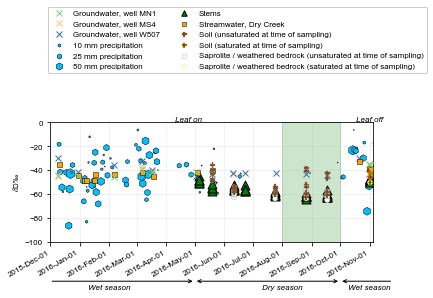

In [26]:
### ISOTOPE TIMESERIES - dD
fig, (ax2) = plt.subplots(1, 1, 
                        sharex=True, 
                        figsize=((6),(4)))
# plt.subplots_adjust(wspace=0.0, hspace=0.0)


stems = stems.sort_values('datetime')
stems = stems[stems.Location != 'T87']
trees = sorted(set((stems['Location'])))
cNormTrees  = colors.Normalize(vmin=0,vmax=5)
scalarMapTrees = cmx.ScalarMappable(norm=cNormTrees, cmap=plt.get_cmap('jet') ) #_r reverses cmap
sagehornGW = sagehornGW.sort_values('datetime')
wells = sorted(set((sagehornGW['Location'])))

cNormWells  = colors.Normalize(vmin=0, vmax=len(wells)+1)
scalarMapWells = cmx.ScalarMappable(norm=cNormWells, cmap=plt.get_cmap('Accent') ) #_r reverses cmap


# ax0.plot(gw.datetime, -gw['MN-1'], c=scalarMapWells.to_rgba(wells.index('MN1')),
#          label='Well MN1')

# ax0.plot(gw.datetime, -gw['MS-4'], c=scalarMapWells.to_rgba(wells.index('MS4')),
#          label='Well MS4')
# ax0.plot(gw.datetime, -gw['507'], c=scalarMapWells.to_rgba(wells.index('W507')),
#          label='Well 507')

# #horiz lines for pressure transducer depth
# ax0.axhline(y=1.86,
#             #label = 'Pressure transducer depth (MS-4)',
#             color=scalarMapWells.to_rgba(wells.index('MS4')),ls='dashed') 
# ax0.axhline(y=1.90,
#             #label = 'Pressure transducer depth (MN-1)',
#             color=scalarMapWells.to_rgba(wells.index('MN1')),ls='dashed') 

# ax0.set_ylim([0,2.5])
# ax0.invert_yaxis()    
# #ax0.grid(ls='dashed')
# ax0.set_ylabel('Groundwater depth \n below ground surface [m]')
# #bogus point for legend
# ax0.errorbar(meansPredawn.index[0],1000,
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')


# # Water potential data
# ax0_twin = ax0.twinx()
# ax0_twin.errorbar(meansPredawn.index,-meansPredawn['PRESSURE [MPa]'],
#                   yerr=stdsPredawn['PRESSURE [MPa]'],
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')
# ax0_twin.set_ylim([-4,.1])
# ax0_twin.set_ylabel('Predawn water \n potential [MPa]')
# ax0.legend(loc='lower left',fontsize=8,numpoints=1, facecolor="white", framealpha=1)


ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '10 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(10+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '25 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(25+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '50 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(50+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000, label='Stems',
                                   s=30, marker='^', color = 'green', edgecolor='black')

for well in wells:
    if well == 'MN1':
        symbol = 'x'
        zo = 100
    else:
        symbol = 'x'
        zo = 99
    plotData = sagehornGW[sagehornGW['Location']==well]
    plotData = plotData.sort_values('datetime')

    wellScatterPlot = ax2.plot_date(plotData['datetime'], plotData['dD'],
                                  c=scalarMapWells.to_rgba(wells.index(well)),
                               marker=symbol,
                                 label = 'Groundwater, well ' + well, 
                                    zorder=zo)
dryPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Streamwater, Dry Creek',
            color = 'orange',
            edgecolor='black',
            linewidth='0.5',
            marker = 's',
              s=10,zorder=100)
lw = 0.3
s = 25
soil_color = 'saddlebrown'
# DRILLED SAMPLES
soilPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Soil (unsaturated at time of sampling)',
            color = soil_color,
            edgecolor='grey',
            linewidth=lw,
            marker = 'P',
              s=s,zorder=100)
soilPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Soil (saturated at time of sampling)',
            color = soil_color,
            edgecolor='gold',
            linewidth=lw,
            marker = 'P',
              s=s,zorder=100)
sap_wxbdkPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Saprolite / weathered bedrock (unsaturated at time of sampling)',
            color = 'white',
           edgecolor= 'grey',
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)
sap_wxbdkPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Saprolite / weathered bedrock (saturated at time of sampling)',
            color = 'white',
           edgecolor= 'gold',
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)
#######################
######## LEGEND ########
#######################
ax2.legend(ncol=2,fontsize=8, 
           scatterpoints = 1, 
           bbox_to_anchor=(1,.8), 
           loc="lower right",  bbox_transform=fig.transFigure,
#            bbox_to_anchor=(1, 1), 
           facecolor="white", framealpha=1)

for tree in trees:
    plotData = stems[stems['Location']==tree]
    treePointsPlot = ax2.scatter(plotData['datetime'].values, plotData['dD'], 
                                 label='Stems',
                                   s=80, marker='^', 
                                 zorder=50,
                                 color = 'green', edgecolor='black')
                                   #c=scalarMapTrees.to_rgba(trees.index(tree)))    

# DRILLED SAMPLES
soilPlot = ax2.scatter(soil['datetime'].values,soil['dD'],
#            label = 'Drilled, shallow',
            color = soil_color,
            edgecolor=soil['edgecolors'],
            linewidth=lw,
            marker = 'P',
              s=s,zorder=150)
# DRILLED SAMPLES
sap_wxbdkPlot = ax2.scatter(sap_wxbedrock['datetime'].values,sap_wxbedrock['dD'],
#            label = 'Drilled, deep',
            color = 'white',
           edgecolor= sap_wxbedrock['edgecolors'],
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)

        
#Dry Creek
dryPlot = ax2.scatter(dry['datetime'].values,dry['dD'],
           label = 'Dry Creek',
            color = 'orange',
            edgecolor='black',
            linewidth='0.5',
            marker = 's',
              s=s,zorder=100)
    
### precip dD
precipPlot = ax2.scatter(sagehornRain['datetime'].values,sagehornRain['dD'],
           # label = 'Precipitation (individual storms)',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth=0.5,
            marker = 'h',zorder=-100,
              s=(sagehornRain['previousRain_mm'].astype(int)+1))


ax2.set_ylabel(r'$\delta$D' + u'\u2030')
# ax2.set_ylim([-70, -20])
ax2.set_ylim([-100, 0])


#### extras
#lgd = ax1.legend(handles, labels, title='Tree and Groundwater Isotopes', loc='upper center', numpoints=1, bbox_to_anchor=(1.1,1))

plt.xlim([pd.to_datetime('2015-12-01 00:00:00'), 
          pd.to_datetime('2016-11-05 00:00:00')])
#ax0.set_title('Sagehorn Shallow Groundwater and Oregon White Oak (Stems) 2016 Time Series')



myFmt = mdates.DateFormatter('%Y-%b-%d')
ax2.xaxis.set_major_formatter(myFmt)

plt.rcParams['font.size'] = 8

# ax0.text(-.09, 1., '(a)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax0.transAxes,
#         color='black', fontsize=8)
# ax1.text(0.0, 1.1, '(b)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax1.transAxes,
# #         color='black', fontsize=8)
# ax2.text(-.09, 1., '(b)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax2.transAxes,
#         color='black', fontsize=8)
# ax2.set_zorder(1)

fig.autofmt_xdate()

# ax0.grid(alpha=.2)
ax2.grid(alpha=.2)
# # Groundwater line
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-11-01'),-42), 
#             xytext=(pd.to_datetime('2016-05-01'),-42), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'blue',"lw":2,"alpha":1})
# #Oak line
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-06-05'),-58), 
#             xytext=(pd.to_datetime('2016-05-01'),-49), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'green',"lw":2,"alpha":1})
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-10-01'),-63), 
#             xytext=(pd.to_datetime('2016-06-01'),-57), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'green',"lw":2,"alpha":1})
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-10-29'),-49), 
#             xytext=(pd.to_datetime('2016-9-27'),-63), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "--",
#                        "color":'green',"lw":2,"alpha":1})

# ax2.text(pd.to_datetime('2016-07-15'), -37., 'Groundwater',
#         verticalalignment='top', horizontalalignment='center',
#         color='blue', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-07-25'), -65., 'Oaks and weathered bedrock',
#         verticalalignment='top', horizontalalignment='center', rotation=-6,
#         color='green', fontsize=8, style='italic')

ax2.axvspan(pd.to_datetime('2016-08-01'),
           pd.to_datetime('2016-10-1'),
           color='green',alpha=.2,zorder=-100)

yloc = -133
ax2.annotate(s='', 
            xy=(pd.to_datetime('2016-05-01'),yloc), 
            xytext=(pd.to_datetime('2015-12-01'),yloc), 
            arrowprops=dict(arrowstyle='->'), annotation_clip = False)
ax2.annotate(s='', 
            xy=(pd.to_datetime('2016-10-1'),yloc), 
            xytext=(pd.to_datetime('2016-05-01'),yloc), 
            arrowprops=dict(arrowstyle='<->'), annotation_clip = False)
ax2.annotate(s='', 
            xy=(pd.to_datetime('2016-11-25'),yloc), 
            xytext=(pd.to_datetime('2016-10-01'),yloc), 
            arrowprops=dict(arrowstyle='<-'), annotation_clip = False)

ax2.text(pd.to_datetime('2016-02-01'), yloc-3, 'Wet season',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax2.text(pd.to_datetime('2016-11-01'), yloc-3, 'Wet season',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax2.text(pd.to_datetime('2016-08-01'), yloc-3, 'Dry season',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax2.text(pd.to_datetime('2016-04-25'), 5, 'Leaf on',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')
ax2.text(pd.to_datetime('2016-11-01'), 5, 'Leaf off',
        verticalalignment='top', horizontalalignment='center',
#         transform=ax0.transAxes,
        color='black', fontsize=8, style='italic')

savedFile = '../Figs/Timeseries-isotopes.pdf'
# plt.tight_layout()
# plt.savefig(savedFile)
plt.savefig(savedFile, bbox_inches='tight', pad_inches=0)
# os.startfile(savedFile)

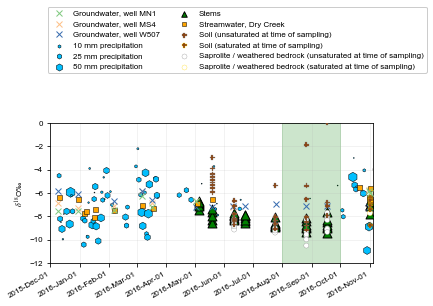

In [16]:
### ISOTOPE TIMESERIES - dO
fig, (ax2) = plt.subplots(1, 1, 
                        sharex=True, 
                        figsize=((6),(4)))
# plt.subplots_adjust(wspace=0.0, hspace=0.0)


stems = stems.sort_values('datetime')
stems = stems[stems.Location != 'T87']
trees = sorted(set((stems['Location'])))
cNormTrees  = colors.Normalize(vmin=0,vmax=5)
scalarMapTrees = cmx.ScalarMappable(norm=cNormTrees, cmap=plt.get_cmap('jet') ) #_r reverses cmap
sagehornGW = sagehornGW.sort_values('datetime')
wells = sorted(set((sagehornGW['Location'])))

cNormWells  = colors.Normalize(vmin=0, vmax=len(wells)+1)
scalarMapWells = cmx.ScalarMappable(norm=cNormWells, cmap=plt.get_cmap('Accent') ) #_r reverses cmap


# ax0.plot(gw.datetime, -gw['MN-1'], c=scalarMapWells.to_rgba(wells.index('MN1')),
#          label='Well MN1')

# ax0.plot(gw.datetime, -gw['MS-4'], c=scalarMapWells.to_rgba(wells.index('MS4')),
#          label='Well MS4')
# ax0.plot(gw.datetime, -gw['507'], c=scalarMapWells.to_rgba(wells.index('W507')),
#          label='Well 507')

# #horiz lines for pressure transducer depth
# ax0.axhline(y=1.86,
#             #label = 'Pressure transducer depth (MS-4)',
#             color=scalarMapWells.to_rgba(wells.index('MS4')),ls='dashed') 
# ax0.axhline(y=1.90,
#             #label = 'Pressure transducer depth (MN-1)',
#             color=scalarMapWells.to_rgba(wells.index('MN1')),ls='dashed') 

# ax0.set_ylim([0,2.5])
# ax0.invert_yaxis()    
# #ax0.grid(ls='dashed')
# ax0.set_ylabel('Groundwater depth \n below ground surface [m]')
# #bogus point for legend
# ax0.errorbar(meansPredawn.index[0],1000,
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')


# # Water potential data
# ax0_twin = ax0.twinx()
# ax0_twin.errorbar(meansPredawn.index,-meansPredawn['PRESSURE [MPa]'],
#                   yerr=stdsPredawn['PRESSURE [MPa]'],
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')
# ax0_twin.set_ylim([-4,.1])
# ax0_twin.set_ylabel('Predawn water \n potential [MPa]')
# ax0.legend(loc='lower left',fontsize=8,numpoints=1, facecolor="white", framealpha=1)


ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '10 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(10+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '25 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(25+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
            label = '50 mm precipitation',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth='0.5',
            marker = 'h',
            s=(50+1))
ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000, label='Stems',
                                   s=30, marker='^', color = 'green', edgecolor='black')

for well in wells:
    if well == 'MN1':
        symbol = 'x'
        zo = 100
    else:
        symbol = 'x'
        zo = 99
    plotData = sagehornGW[sagehornGW['Location']==well]
    plotData = plotData.sort_values('datetime')

    wellScatterPlot = ax2.plot_date(plotData['datetime'], plotData['dO'],
                                  c=scalarMapWells.to_rgba(wells.index(well)),
                               marker=symbol,
                                 label = 'Groundwater, well ' + well, 
                                    zorder=zo)
dryPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Streamwater, Dry Creek',
            color = 'orange',
            edgecolor='black',
            linewidth='0.5',
            marker = 's',
              s=10,zorder=100)
lw = 0.3
s = 25
soil_color = 'saddlebrown'
# DRILLED SAMPLES
soilPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Soil (unsaturated at time of sampling)',
            color = soil_color,
            edgecolor='grey',
            linewidth=lw,
            marker = 'P',
              s=s,zorder=100)
soilPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Soil (saturated at time of sampling)',
            color = soil_color,
            edgecolor='gold',
            linewidth=lw,
            marker = 'P',
              s=s,zorder=100)
sap_wxbdkPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Saprolite / weathered bedrock (unsaturated at time of sampling)',
            color = 'white',
           edgecolor= 'grey',
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)
sap_wxbdkPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
           label = 'Saprolite / weathered bedrock (saturated at time of sampling)',
            color = 'white',
           edgecolor= 'gold',
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)
#######################
######## LEGEND ########
#######################
ax2.legend(ncol=2,fontsize=8, 
           scatterpoints = 1, 
           bbox_to_anchor=(1,.8), 
           loc="lower right",  bbox_transform=fig.transFigure,
#            bbox_to_anchor=(1, 1), 
           facecolor="white", framealpha=1)

for tree in trees:
    plotData = stems[stems['Location']==tree]
    treePointsPlot = ax2.scatter(plotData['datetime'].values, plotData['dO'], 
                                 label='Stems',
                                   s=80, marker='^', 
                                 zorder=50,
                                 color = 'green', edgecolor='black')
                                   #c=scalarMapTrees.to_rgba(trees.index(tree)))    

# DRILLED SAMPLES
soilPlot = ax2.scatter(soil['datetime'].values,soil['dO'],
#            label = 'Drilled, shallow',
            color = soil_color,
            edgecolor=soil['edgecolors'],
            linewidth=lw,
            marker = 'P',
              s=s,zorder=150)
# DRILLED SAMPLES
sap_wxbdkPlot = ax2.scatter(sap_wxbedrock['datetime'].values,sap_wxbedrock['dO'],
#            label = 'Drilled, deep',
            color = 'white',
           edgecolor= sap_wxbedrock['edgecolors'],
            linewidth=lw,
            marker = 'o',
              s=s,zorder=100)

        
#Dry Creek
dryPlot = ax2.scatter(dry['datetime'].values,dry['dO'],
           label = 'Dry Creek',
            color = 'orange',
            edgecolor='black',
            linewidth='0.5',
            marker = 's',
              s=s,zorder=100)
    
### precip dD
precipPlot = ax2.scatter(sagehornRain['datetime'].values,sagehornRain['dO'],
           # label = 'Precipitation (individual storms)',
            color = 'deepskyblue',
            edgecolor='black',
            linewidth=0.5,
            marker = 'h',zorder=-100,
              s=(sagehornRain['previousRain_mm'].astype(int)+1))


ax2.set_ylabel(r'$\delta^{18}$O' + u'\u2030')
# ax2.set_ylim([-70, -20])
ax2.set_ylim([-12, 0])


#### extras
#lgd = ax1.legend(handles, labels, title='Tree and Groundwater Isotopes', loc='upper center', numpoints=1, bbox_to_anchor=(1.1,1))

plt.xlim([pd.to_datetime('2015-12-01 00:00:00'), 
          pd.to_datetime('2016-11-05 00:00:00')])
#ax0.set_title('Sagehorn Shallow Groundwater and Oregon White Oak (Stems) 2016 Time Series')



myFmt = mdates.DateFormatter('%Y-%b-%d')
ax2.xaxis.set_major_formatter(myFmt)

plt.rcParams['font.size'] = 8

# ax0.text(-.09, 1., '(a)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax0.transAxes,
#         color='black', fontsize=8)
# ax1.text(0.0, 1.1, '(b)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax1.transAxes,
# #         color='black', fontsize=8)
# ax2.text(-.09, 1., '(b)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax2.transAxes,
#         color='black', fontsize=8)
# ax2.set_zorder(1)

fig.autofmt_xdate()

# ax0.grid(alpha=.2)
ax2.grid(alpha=.2)
# # Groundwater line
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-11-01'),-42), 
#             xytext=(pd.to_datetime('2016-05-01'),-42), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'blue',"lw":2,"alpha":1})
# #Oak line
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-06-05'),-58), 
#             xytext=(pd.to_datetime('2016-05-01'),-49), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'green',"lw":2,"alpha":1})
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-10-01'),-63), 
#             xytext=(pd.to_datetime('2016-06-01'),-57), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "-",
#                        "color":'green',"lw":2,"alpha":1})
# ax2.annotate(s='', zorder=-100,
#             xy=(pd.to_datetime('2016-10-29'),-49), 
#             xytext=(pd.to_datetime('2016-9-27'),-63), 
#             arrowprops={"arrowstyle":'->', "linestyle" : "--",
#                        "color":'green',"lw":2,"alpha":1})

# ax2.text(pd.to_datetime('2016-07-15'), -37., 'Groundwater',
#         verticalalignment='top', horizontalalignment='center',
#         color='blue', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-07-25'), -65., 'Oaks and weathered bedrock',
#         verticalalignment='top', horizontalalignment='center', rotation=-6,
#         color='green', fontsize=8, style='italic')

ax2.axvspan(pd.to_datetime('2016-08-01'),
           pd.to_datetime('2016-10-1'),
           color='green',alpha=.2,zorder=-100)

# yloc = -12
# ax2.annotate(s='', 
#             xy=(pd.to_datetime('2016-05-01'),yloc), 
#             xytext=(pd.to_datetime('2015-12-01'),yloc), 
#             arrowprops=dict(arrowstyle='->'), annotation_clip = False)
# ax2.annotate(s='', 
#             xy=(pd.to_datetime('2016-10-1'),yloc), 
#             xytext=(pd.to_datetime('2016-05-01'),yloc), 
#             arrowprops=dict(arrowstyle='<->'), annotation_clip = False)
# ax2.annotate(s='', 
#             xy=(pd.to_datetime('2016-11-25'),yloc), 
#             xytext=(pd.to_datetime('2016-10-01'),yloc), 
#             arrowprops=dict(arrowstyle='<-'), annotation_clip = False)

# ax2.text(pd.to_datetime('2016-02-01'), yloc-3, 'Wet season',
#         verticalalignment='top', horizontalalignment='center',
# #         transform=ax0.transAxes,
#         color='black', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-11-01'), yloc-3, 'Wet season',
#         verticalalignment='top', horizontalalignment='center',
# #         transform=ax0.transAxes,
#         color='black', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-08-01'), yloc-3, 'Dry season',
#         verticalalignment='top', horizontalalignment='center',
# #         transform=ax0.transAxes,
#         color='black', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-04-25'), 5, 'Leaf on',
#         verticalalignment='top', horizontalalignment='center',
# #         transform=ax0.transAxes,
#         color='black', fontsize=8, style='italic')
# ax2.text(pd.to_datetime('2016-11-01'), 5, 'Leaf off',
#         verticalalignment='top', horizontalalignment='center',
# #         transform=ax0.transAxes,
#         color='black', fontsize=8, style='italic')

savedFile = '../Figs/Timeseries-isotopes-dO.pdf'
# plt.tight_layout()
# plt.savefig(savedFile)
plt.savefig(savedFile, bbox_inches='tight', pad_inches=0)
# os.startfile(savedFile)

In [37]:
# ### TIME SERIES - TWO ROWS
# fig, (ax0, ax2) = plt.subplots(2, 1, 
#                                     sharex=True, 
#                                     figsize=((19/2.54),(11.5/2.54)))
# plt.subplots_adjust(wspace=0.0, hspace=0.0)


# stems = stems.sort_values('datetime')
# stems = stems[stems.Location != 'T87']
# trees = sorted(set((stems['Location'])))
# cNormTrees  = colors.Normalize(vmin=0,vmax=5)
# scalarMapTrees = cmx.ScalarMappable(norm=cNormTrees, cmap=plt.get_cmap('jet') ) #_r reverses cmap
# sagehornGW = sagehornGW.sort_values('datetime')
# wells = sorted(set((sagehornGW['Location'])))

# cNormWells  = colors.Normalize(vmin=0, vmax=len(wells)+1)
# scalarMapWells = cmx.ScalarMappable(norm=cNormWells, cmap=plt.get_cmap('Accent') ) #_r reverses cmap


# ax0.plot(gw.datetime, -gw['MN-1'], c=scalarMapWells.to_rgba(wells.index('MN1')),
#          label='Well MN1')

# ax0.plot(gw.datetime, -gw['MS-4'], c=scalarMapWells.to_rgba(wells.index('MS4')),
#          label='Well MS4')
# ax0.plot(gw.datetime, -gw['507'], c=scalarMapWells.to_rgba(wells.index('W507')),
#          label='Well 507')

# # #horiz lines for pressure transducer depth
# # ax0.axhline(y=1.86,
# #             #label = 'Pressure transducer depth (MS-4)',
# #             color=scalarMapWells.to_rgba(wells.index('MS4')),ls='dashed') 
# # ax0.axhline(y=1.90,
# #             #label = 'Pressure transducer depth (MN-1)',
# #             color=scalarMapWells.to_rgba(wells.index('MN1')),ls='dashed') 

# ax0.set_ylim([0,2.5])
# ax0.invert_yaxis()    
# #ax0.grid(ls='dashed')
# ax0.set_ylabel('Groundwater depth \n below ground surface [m]')
# #bogus point for legend
# ax0.errorbar(meansPredawn.index[0],1000,
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')


# # Water potential data
# ax0_twin = ax0.twinx()
# ax0_twin.errorbar(meansPredawn.index,-meansPredawn['PRESSURE [MPa]'],
#                   yerr=stdsPredawn['PRESSURE [MPa]'],
#                   fmt='o', c='w', ecolor='k', capsize=0, elinewidth=1,ms=7,mew=1,mec='black', label='Shoot water potential')
# ax0_twin.set_ylim([-4,.1])
# ax0_twin.set_ylabel('Predawn water \n potential [MPa]')
# ax0.legend(loc='lower left',fontsize=8,numpoints=1, facecolor="white", framealpha=1)


# ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
#             label = '10 mm precipitation',
#             color = 'deepskyblue',
#             edgecolor='black',
#             linewidth='0.5',
#             marker = '*',
#             s=(10+1))
# ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
#             label = '25 mm precipitation',
#             color = 'deepskyblue',
#             edgecolor='black',
#             linewidth='0.5',
#             marker = '*',
#             s=(25+1))
# ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
#             label = '50 mm precipitation',
#             color = 'deepskyblue',
#             edgecolor='black',
#             linewidth='0.5',
#             marker = '*',
#             s=(50+1))
# ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000, label='Stems',
#                                    s=20, marker='^', color = 'green', edgecolor='black')

# for well in wells:
#     if well == 'MN1':
#         symbol = 'x'
#         zo = 100
#     else:
#         symbol = 'x'
#         zo = 99
#     plotData = sagehornGW[sagehornGW['Location']==well]
#     plotData = plotData.sort_values('datetime')

#     wellScatterPlot = ax2.plot_date(plotData['datetime'], plotData['dD'],
#                                   c=scalarMapWells.to_rgba(wells.index(well)),
#                                marker=symbol,
#                                  label = 'Groundwater, well ' + well, 
#                                     zorder=zo)
# dryPlot = ax2.scatter(pd.to_datetime('2016-11-19 00:00:00'),1000,
#            label = 'Dry Creek',
#             color = 'orange',
#             edgecolor='black',
#             linewidth='0.5',
#             marker = 's',
#               s=10,zorder=100)
# ax2.legend(ncol=1,fontsize=8, 
#            scatterpoints = 1, 
#            bbox_to_anchor=(1,0), loc="lower right",  bbox_transform=fig.transFigure,
# #            bbox_to_anchor=(1, 1), 
#            facecolor="white", framealpha=1)

# for tree in trees:
#     plotData = stems[stems['Location']==tree]
#     treePointsPlot = ax2.scatter(plotData['datetime'].values, plotData['dD'], label='Stems',
#                                    s=20, marker='^', color = 'green', edgecolor='black')
#                                    #c=scalarMapTrees.to_rgba(trees.index(tree)))    

# #Dry Creek
# dryPlot = ax2.scatter(dry['datetime'].values,dry['dD'],
#            label = 'Dry Creek',
#             color = 'orange',
#             edgecolor='black',
#             linewidth='0.5',
#             marker = 's',
#               s=10,zorder=100)
    
# ### precip dD
# precipPlot = ax2.scatter(sagehornRain['datetime'].values,sagehornRain['dD'],
#            # label = 'Precipitation (individual storms)',
#             color = 'deepskyblue',
#             edgecolor='black',
#             linewidth=0.5,
#             marker = '*',zorder=-100,
#               s=(sagehornRain['previousRain_mm'].astype(int)+1))


# ax2.set_ylabel(r'$\delta$D' + u'\u2030')
# # ax2.set_ylim([-70, -20])
# ax2.set_ylim([-100, 0])


# #### extras
# #lgd = ax1.legend(handles, labels, title='Tree and Groundwater Isotopes', loc='upper center', numpoints=1, bbox_to_anchor=(1.1,1))

# plt.xlim([pd.to_datetime('2015-12-01 00:00:00'), pd.to_datetime('2017-12-01 00:00:00')])
# #ax0.set_title('Sagehorn Shallow Groundwater and Oregon White Oak (Stems) 2016 Time Series')



# myFmt = mdates.DateFormatter('%d %b %Y ')
# ax2.xaxis.set_major_formatter(myFmt)

# plt.rcParams['font.size'] = 8

# ax0.text(-.09, 1., '(a)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax0.transAxes,
#         color='black', fontsize=8)
# # ax1.text(0.0, 1.1, '(b)',
# #         verticalalignment='top', horizontalalignment='left',
# #         transform=ax1.transAxes,
# #         color='black', fontsize=8)
# ax2.text(-.09, 1., '(b)',
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax2.transAxes,
#         color='black', fontsize=8)
# ax2.set_zorder(1)

# fig.autofmt_xdate()

# ax0.grid(alpha=.2)
# ax2.grid(alpha=.2)


# savedFile = '../Figs/Sagehorn_QUGA_Well_timeseries.pdf'
# # plt.tight_layout()
# # plt.savefig(savedFile)
# plt.savefig(savedFile, bbox_inches='tight', pad_inches=0)
# # os.startfile(savedFile)